## Risk
#### 19.04.2019

In [83]:
# connection necessary packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco

## Helpfull function

In [84]:
# profitability of the portfolio
def port_mean(d, means, n_days=250):
    d = np.array(d)
    return np.sum(means * d) * n_days


# volatility of the portfolio
def port_vol(d, cov, n_days=250):
    d = np.array(d)
    return np.sqrt(np.dot(d.T, np.dot(cov * n_days, d)))

In [85]:
ret = np.linspace(0,.6,1000)
risk_tol = range(1, 11)
work = {'Return': list(ret)}
for tol in risk_tol:
    work[tol] = [np.sqrt(2 * i / tol) for i in ret]
work = pd.DataFrame(work)
work.head()

,Return,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000601,0.034658,0.024507,0.020010,0.017329,0.015500,0.014149,0.013100,0.012254,0.011553,0.010960
2,0.001201,0.049014,0.034658,0.028298,0.024507,0.021920,0.020010,0.018526,0.017329,0.016338,0.015500
3,0.001802,0.060030,0.042448,0.034658,0.030015,0.026846,0.024507,0.022689,0.021224,0.020010,0.018983
4,0.002402,0.069317,0.049014,0.040020,0.034658,0.030999,0.028298,0.026199,0.024507,0.023106,0.021920


## Utilyti curves

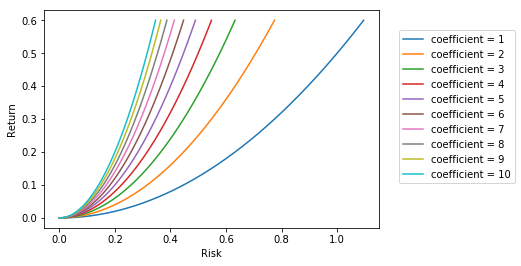

In [86]:
for i in list(work.columns)[1:]:
    _=plt.plot(work[i], work['Return'], label = 'coefficient = ' + str(i))
_=plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad = 2)
ax = plt.gca()
_=ax.set_xlabel('Risk', fontsize=10)
_=ax.set_ylabel('Return', fontsize=10)

In [87]:
temp = list(work[2])
work_a = pd.DataFrame({'Risk': temp, 'No': [i**2 for i in temp]})


In [88]:
z = list(np.linspace(0,.2, 4))
for j in range(len(z)):
    i = z.pop(0)
    i = round(i, 2)
    z.append(i)

In [89]:
for i in z:
    work_a[i] = [j + i for j in work_a['No']]

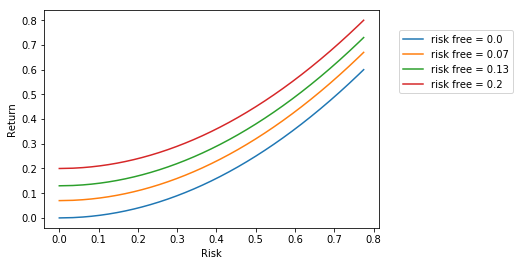

In [90]:
for i in z:
    _=plt.plot(work_a['Risk'], work_a[i], label = 'risk free = ' + str(i))
_=plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad = 2)
ax = plt.gca()
_=ax.set_xlabel('Risk', fontsize=10)
_=ax.set_ylabel('Return', fontsize=10)

## Effective frontier of portfolio

In [125]:
# download and calculate data
index = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Diploma/master/MAIN_DATA/MOEXBC_c.csv'
                    , header=0, index_col=0, parse_dates={'Date': [0]}, sep=';')
bond = pd.read_csv('https://raw.githubusercontent.com/Aurilino/Diploma/master/MAIN_DATA/RGBITR_c.csv '
                    , header=0, index_col=0, parse_dates={'Date': [0]}, sep=';')

In [126]:
index.head()

,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR
Date,,,,,,,,,,,
2012-02-04,10385.31,10362.35,10487.99,10313.91,7.420598e+09,NaN,NaN,2,4.590000e+12,RUB,1000000.0
2012-03-04,10581.19,10385.31,10619.12,10383.21,8.098461e+09,NaN,NaN,2,4.670000e+12,RUB,1000000.0
2012-04-04,10337.60,10581.19,10581.19,10300.78,8.829368e+09,NaN,NaN,2,4.570000e+12,RUB,1000000.0
2012-05-04,10427.70,10337.60,10438.99,10229.37,8.297107e+09,NaN,NaN,2,4.610000e+12,RUB,1000000.0
2012-06-04,10240.05,10427.70,10453.82,10226.64,4.736726e+09,NaN,NaN,2,4.520000e+12,RUB,1000000.0


In [127]:
bond.head()

,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR
Date,,,,,,,,,,,
2012-02-04,284.03,283.94,284.03,283.66,1.112848e+09,NaN,7.37,2,NaN,RUB,NaN
2012-03-04,284.09,284.25,284.31,283.98,1.132301e+09,NaN,7.33,2,NaN,RUB,NaN
2012-04-04,283.81,283.91,287.11,283.69,1.585009e+09,NaN,7.36,2,NaN,RUB,NaN
2012-05-04,283.85,283.96,284.12,283.85,6.584582e+09,NaN,7.39,2,NaN,RUB,NaN
2012-06-04,283.69,283.67,283.91,283.67,4.198913e+09,NaN,7.36,2,NaN,RUB,NaN


In [128]:
temp = ['OPEN', 'HIGH', 'LOW', 'VALUE', 'DURATION', 'YIELD', 'DECIMALS', 'CAPITALIZATION', 'CURRENCYID', 'DIVISOR']
for i in temp:
    del index[i]
    del bond[i]

In [129]:
main = pd.merge(index, bond, left_index = True, right_index = True)
main = main.apply(lambda x: (x - x.shift(1)) / x.shift(1))
main = main.dropna()
main.head()

,CLOSE_x,CLOSE_y
Date,,
2012-03-04,0.018861,0.000211
2012-04-04,-0.023021,-0.000986
2012-05-04,0.008716,0.000141
2012-06-04,-0.017995,-0.000564
2012-09-04,0.007783,-0.001128


In [130]:
means = np.mean(main)
cov = np.cov(main, rowvar = False)

In [131]:
means

CLOSE_x    0.000361
CLOSE_y    0.000325
dtype: float64

In [132]:
cov

array([[1.36855002e-04, 9.40594871e-06],
       [9.40594871e-06, 1.82454667e-05]])

In [133]:
# generate all posible portfolio
block = pd.DataFrame({'Index': [(1000 - i) / 1000 for i in range(1001)], 'Bond': [(0 + i) / 1000 for i in range(1001)]})
n_assets = 2
r_f = .075
# calculate 
block['Sum'] = block.sum(axis=1)
block['Mu'] = 0
block['Volatility'] = 0
for i in range(len(work.index) + 1):
    d = np.array(block.iloc[i, :n_assets])
    block.iloc[i, (n_assets + 1)] = port_mean(d, means, n_days=250)
    block.iloc[i, (n_assets + 2)] = port_vol(d, cov, n_days=250)
block['Sharp_ratio'] = (block['Mu'] - r_f) / block['Volatility']
block.tail()

,Index,Bond,Sum,Mu,Volatility,Sharp_ratio
996,0.004,0.996,1.0,0.081314,0.067411,0.093664
997,0.003,0.997,1.0,0.081305,0.067442,0.093489
998,0.002,0.998,1.0,0.081296,0.067473,0.093313
999,0.001,0.999,1.0,0.081287,0.067505,0.093137
1000,0.000,1.000,1.0,0.081278,0.067538,0.092960


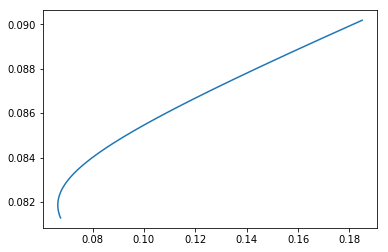

In [134]:
_=plt.plot(block['Volatility'], block['Mu'])

In [152]:
a = [i / 2 for i in list(work_a['Risk'])]
b = [i for i in list(np.linspace(.075,.1, 1000))]
z = [round(i, 4) for i in list(np.linspace(0,.024, 11))]

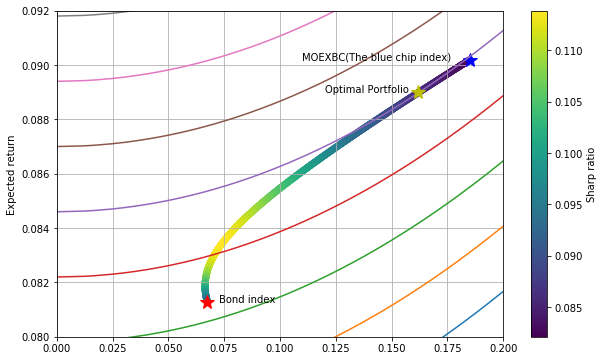

In [163]:
_=plt.figure(figsize = (10, 6))
_=plt.scatter(block['Volatility'], block['Mu'], c = block['Sharp_ratio'], marker = 'o')
_=plt.plot(block.iloc[0, 4], block.iloc[0, 3],'b*', markersize=15)
_=plt.plot(block.iloc[len(block.index) - 1, 4], block.iloc[len(block.index) - 1, 3],'r*', markersize=15)
for i in z:
    _=plt.plot(a, [j + i for j in b])
_=plt.grid(True)
_=plt.plot(0.162, 0.089,'y*', markersize = 15)
_=plt.annotate('Optimal Portfolio', xy = (0.12, 0.089))
_=plt.annotate('MOEXBC(The blue chip index)', xy=(block.iloc[0, 4] - .075, block.iloc[0, 3]))
_=plt.annotate('Bond index', xy=(block.iloc[len(block.index) - 1, 4] + .005, block.iloc[len(block.index) - 1, 3]))
_=plt.ylabel('Expected return')
_=plt.colorbar(label='Sharp ratio')
_=plt.ylim(.08, .092)
_=plt.xlim(0, .2)

In [168]:
z

[0.0,
 0.0024,
 0.0048,
 0.0072,
 0.0096,
 0.012,
 0.0144,
 0.0168,
 0.0192,
 0.0216,
 0.024]

In [165]:
c = [i / 2 for i in list(work[4])]
d = [i for i in list(np.linspace(.06,.12, 1000))]

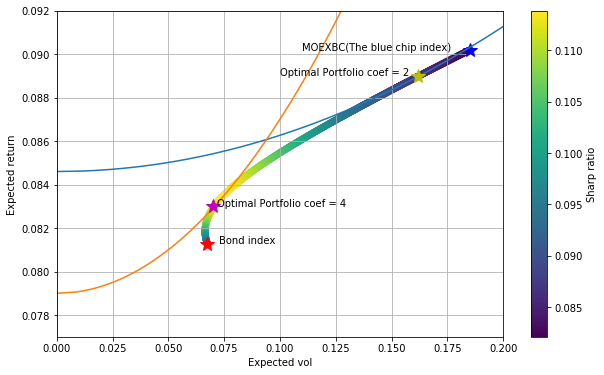

In [184]:
_=plt.figure(figsize = (10, 6))
_=plt.scatter(block['Volatility'], block['Mu'], c = block['Sharp_ratio'], marker = 'o')
_=plt.plot(block.iloc[0, 4], block.iloc[0, 3],'b*', markersize=15)
_=plt.plot(block.iloc[len(block.index) - 1, 4], block.iloc[len(block.index) - 1, 3],'r*', markersize=15)
_=plt.plot(a, [j + .0096 for j in b])
_=plt.plot(c, [j + .019 for j in d])
_=plt.grid(True)
_=plt.plot(0.162, 0.089,'y*', markersize = 15)
_=plt.plot(0.07, 0.083,'m*', markersize = 15)
_=plt.annotate('Optimal Portfolio coef = 2', xy = (0.1, 0.089))
_=plt.annotate('Optimal Portfolio coef = 4', xy = (0.072, 0.083))
_=plt.annotate('MOEXBC(The blue chip index)', xy=(block.iloc[0, 4] - .075, block.iloc[0, 3]))
_=plt.annotate('Bond index', xy=(block.iloc[len(block.index) - 1, 4] + .005, block.iloc[len(block.index) - 1, 3]))
_=plt.xlabel('Expected vol')
_=plt.ylabel('Expected return')
_=plt.colorbar(label='Sharp ratio')
_=plt.ylim(.077, .092)
_=plt.xlim(0, .2)